# LGMVIP October Data Science Internship task 1 

# Iris Flowers classification ML Project

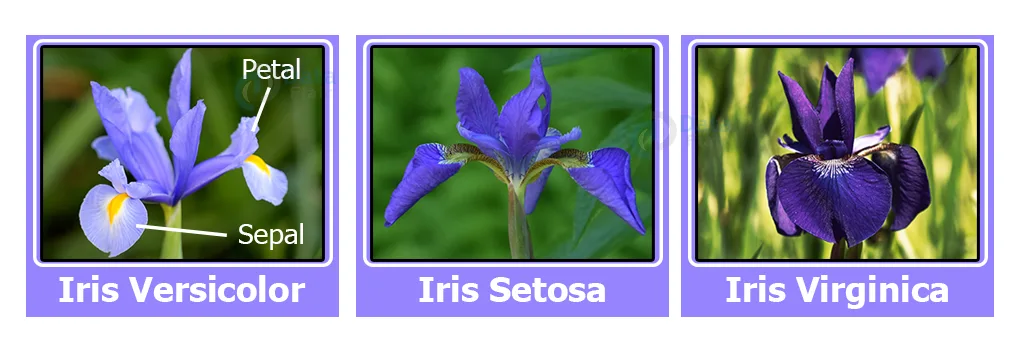

In [1]:
from PIL import Image
iris  = Image.open(r"C:\Users\Riya\Documents\LetMeGrow\iris.webp")

# Table of Contents

In [ ]:
1.Import Libraries
2.Import dataset
3.Exploratory Analysis 
4.Data preparation
5.Training the algorithm Prediction
6.Model Evolution

# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 2.Import dataset

In [2]:
data=pd.read_csv("C:\Let grow more data science intership all datasets\iris.data.csv")
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 5)

# 3. Exploratory Analysis 

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

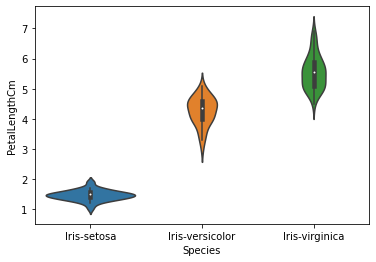

In [4]:
sns.violinplot(data=data,x="Species", y="PetalLengthCm")

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

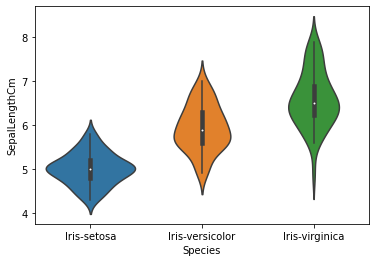

In [5]:
sns.violinplot(data=data,x="Species", y="SepalLengthCm")

In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
pd.set_option("display.max_row",None)
(100*data.isnull().sum())/(len(data))

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [8]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
data.replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2},inplace=True)

In [11]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

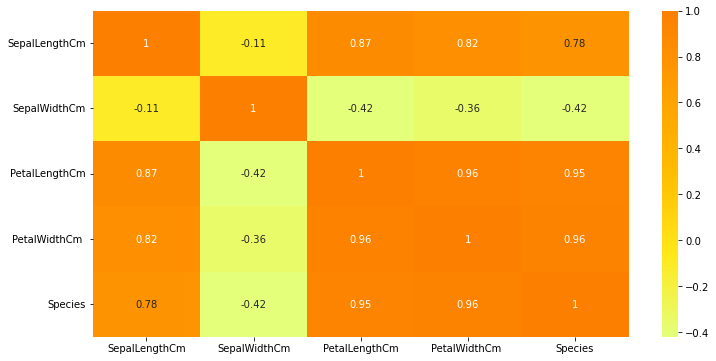

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Wistia')

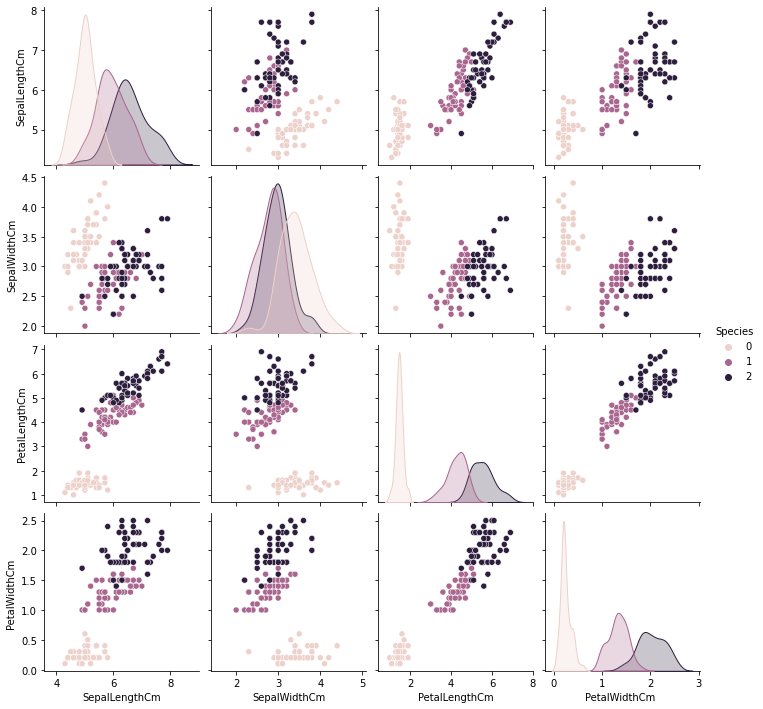

In [13]:
sns.pairplot(data, hue="Species")

In [14]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34      True
35     False
36     False
37      True
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [15]:
data.drop_duplicates(inplace=True)
data.shape

(147, 5)

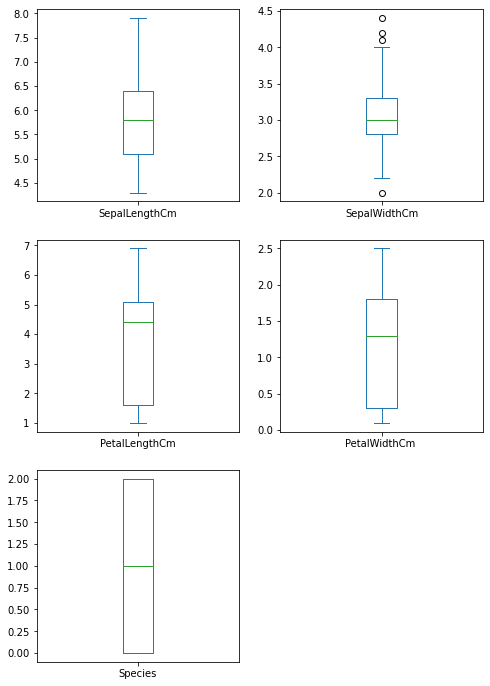

In [16]:
data.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(8,12))
plt.show()

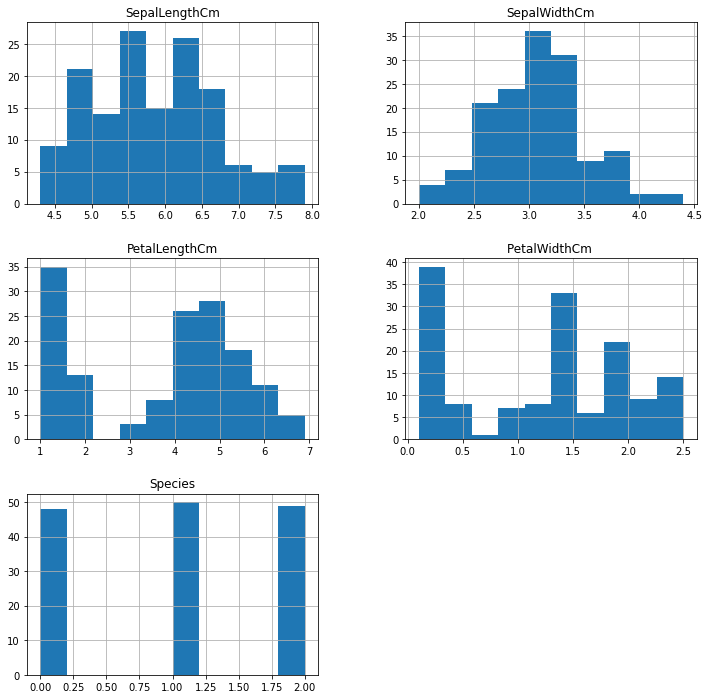

In [17]:
data.hist(figsize=(12,12))
plt.show()

In [18]:
data.skew()

SepalLengthCm    0.292560
SepalWidthCm     0.324351
PetalLengthCm   -0.293763
PetalWidthCm    -0.113479
Species         -0.012561
dtype: float64

# 4.Data Preparation 

In [19]:
x=data.iloc[:,0:4]

In [20]:
y=data.iloc[:,-1]

In [21]:
import sklearn
from sklearn.model_selection import train_test_split

In [22]:
df1_xtrain ,df1_xtest, df1_ytrain , df1_ytest=train_test_split(x,y,test_size=0.8)
df1_xtrain.shape,df1_xtest.shape,df1_ytrain.shape,df1_ytest.shape

((29, 4), (118, 4), (29,), (118,))

# 5.Training the Algorithms and prediction 

In [23]:
# 1. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

lm.fit(df1_xtrain,df1_ytrain)

LogisticRegression()

In [25]:
pre1=lm.predict(df1_xtest)
pre1

array([0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1,
       2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0,
       1, 1, 2, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1,
       1, 1, 0, 0, 2, 0, 0, 1], dtype=int64)

In [26]:
c1=confusion_matrix(pre1,df1_ytest)
c1

array([[38,  0,  0],
       [ 0, 37, 12],
       [ 0,  0, 31]], dtype=int64)

In [27]:
accuracy1=c1.diagonal().sum()/c1.sum()*100
accuracy1

89.83050847457628

In [28]:
from sklearn.metrics import classification_report
print(classification_report(pre1,df1_ytest))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.76      0.86        49
           2       0.72      1.00      0.84        31

    accuracy                           0.90       118
   macro avg       0.91      0.92      0.90       118
weighted avg       0.93      0.90      0.90       118



In [23]:
# 2. Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

dtc.fit(df1_xtrain,df1_ytrain)

DecisionTreeClassifier()

In [25]:
pre2=dtc.predict(df1_xtest)
pre2

array([2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 2,
       1, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 0,
       1, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0,
       0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0,
       0, 2, 2, 2, 1, 1, 0, 2], dtype=int64)

In [26]:
c2=confusion_matrix(pre2,df1_ytest)
c2

array([[42,  0,  0],
       [ 0, 27,  3],
       [ 0, 12, 34]], dtype=int64)

In [27]:
accuracy2=c2.diagonal().sum()/c2.sum()*100
accuracy2

87.28813559322035

In [28]:
print(classification_report(pre2,df1_ytest))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.69      0.90      0.78        30
           2       0.92      0.74      0.82        46

    accuracy                           0.87       118
   macro avg       0.87      0.88      0.87       118
weighted avg       0.89      0.87      0.87       118



In [23]:
# 3. Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(df1_xtrain,df1_ytrain)

GaussianNB()

In [25]:
pre3=nb.predict(df1_xtest)
pre3

array([1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 1, 1, 2, 0, 2, 0, 1, 2, 0, 2, 0,
       2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 2,
       1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1, 2, 0, 2, 2, 0, 2,
       1, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 0, 2,
       2, 0, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 1, 2, 2, 0, 1], dtype=int64)

In [26]:
c3=confusion_matrix(pre3,df1_ytest)
c3

array([[33,  0,  0],
       [ 0, 37,  2],
       [ 0,  8, 38]], dtype=int64)

In [27]:
accuracy3=c3.diagonal().sum()/c3.sum()*100
accuracy3

91.52542372881356

In [28]:
print(classification_report(pre3,df1_ytest)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.82      0.95      0.88        39
           2       0.95      0.83      0.88        46

    accuracy                           0.92       118
   macro avg       0.92      0.92      0.92       118
weighted avg       0.92      0.92      0.92       118



In [23]:
# 4. SVM 

In [24]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(df1_xtrain,df1_ytrain)

SVC()

In [25]:
pre4=svm.predict(df1_xtest)
pre4

array([0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 1, 0,
       0, 0, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1,
       0, 2, 0, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 2, 2, 0, 1, 1, 1], dtype=int64)

In [26]:
c4=confusion_matrix(pre4,df1_ytest)
c4

array([[39,  0,  0],
       [ 0, 38, 19],
       [ 0,  0, 22]], dtype=int64)

In [27]:
accuracy4=c4.diagonal().sum()/c4.sum()*100
accuracy4

83.89830508474576

In [28]:
print(classification_report(pre4,df1_ytest)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.67      0.80        57
           2       0.54      1.00      0.70        22

    accuracy                           0.84       118
   macro avg       0.85      0.89      0.83       118
weighted avg       0.91      0.84      0.85       118



In [23]:
# 5.K-Nearest Neighbours

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(df1_xtrain, df1_ytrain)

KNeighborsClassifier(n_neighbors=8)

In [25]:
pre5=knn.predict(df1_xtest)
pre5

array([1, 1, 0, 1, 1, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0, 0, 1, 2,
       2, 1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2,
       1, 0, 1, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0,
       2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 1,
       1, 2, 2, 2, 2, 1, 2, 1], dtype=int64)

In [26]:
c5=confusion_matrix(pre5,df1_ytest)
c5

array([[41,  0,  0],
       [ 0, 38,  0],
       [ 0,  4, 35]], dtype=int64)

In [27]:
accuracy5=c5.diagonal().sum()/c5.sum()*100
accuracy5

96.61016949152543

In [28]:
print(classification_report(pre5,df1_ytest)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.90      1.00      0.95        38
           2       1.00      0.90      0.95        39

    accuracy                           0.97       118
   macro avg       0.97      0.97      0.97       118
weighted avg       0.97      0.97      0.97       118



# 6. Model Evaluation 

In [29]:
# Accuracy is 97% of K-Nearest Neighbours: the model can predict with 97% accuracy on unseen data. 
# Hence it is a good  and is less likely to make mistakes
# classification report gives details about precision, recall, f-1 score and support